# Chase Bank account activity analysis

### How to use it:

- Go to Chase Bank's website and download your account activity csv file;
- The starting date should be one day previous to the first day of the period you want to analyze;
- Open the csv file, scroll all the way down and copy the most up to date value for the starting date;
- Run the notebook;
- The notebook will prompt you to enter that value, please do so.

### Imports all libraries or library modules used in this notebook.

In [218]:
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as mdates

### Creates a data frame: 
- Header is parsed so each column has a title;
- First line of data frame is then blank and therefore eliminated;
- 'Posting Date' column's data is converted from string to date to facilitate data manipulation and data frame is showed.

In [219]:
header = ['Details', 'Posting Date', 'Description', 'Amount', 'Type', 'Balance', 'Check or Slip #']

try:    
    df = pd.read_csv('Spreadsheet.csv', names = header)
    df = df[1:]
    df['Posting Date'] = pd.to_datetime(df['Posting Date'].str.replace('/', '-'))
    
except:
    print('CSV file not found. Please save it in the same folder as this notebook.')
    
df.head()

,Details,Posting Date,Description,Amount,Type,Balance,Check or Slip #
1,DEBIT,2021-09-30,Wal-Mart Super Center BATAVIA IL 0...,-66.6,DEBIT_CARD,3452.06,NaN
2,DEBIT,2021-09-30,TRADER JOE'S # 689 BATAVIA IL 421818 0...,-3.21,DEBIT_CARD,3518.66,NaN
3,DEBIT,2021-09-30,ALDI 40043 ST CHARLES IL 0...,-10.8,DEBIT_CARD,3521.87,NaN
4,DEBIT,2021-09-30,HUEL HUEL.COM NY 0...,66.8,DEBIT_CARD,3532.67,NaN
5,DEBIT,2021-09-30,HUEL HUEL.COM NY 0...,110.97,DEBIT_CARD,3465.87,1275


### Functions are created to convert string data from 'Amount' and 'Balance' columns to float.

In [220]:
def Amount_to_float(Amount):
    return float(Amount)
def Balance_to_float(Balance):
    return float(Balance)

### Functions are applied using numpy's function 'vectorize' and data frame is sorted from oldest to newest.

In [221]:
df['Amount'] = np.vectorize(Amount_to_float)(df['Amount'])
df['Balance'] = np.vectorize(Balance_to_float)(df['Balance'])
df = df.sort_values('Posting Date')
df

,Details,Posting Date,Description,Amount,Type,Balance,Check or Slip #
1077,CREDIT,2019-12-31,T08 PAYROLL PP...,1226.58,ACH_CREDIT,3680.73,NaN
1076,DEBIT,2019-12-31,B. U. R. AUTO CARE ADDISON IL 1...,-399.44,DEBIT_CARD,3281.29,NaN
1074,DEBIT,2020-01-02,IL TOLLWAY-AUTOREPLEN 800-824-7277 IL 0...,-50.00,DEBIT_CARD,3225.70,NaN
1075,DEBIT,2020-01-02,MCDONALD'S M2518 OF IL BARTLETT IL 0...,-5.59,DEBIT_CARD,3275.70,NaN
1073,DEBIT,2020-01-02,ATM WITHDRAWAL 005620 0...,-100.00,ATM,3125.70,NaN
...,...,...,...,...,...,...,...
5,DEBIT,2021-09-30,HUEL HUEL.COM NY 0...,110.97,DEBIT_CARD,3465.87,1275
4,DEBIT,2021-09-30,HUEL HUEL.COM NY 0...,66.80,DEBIT_CARD,3532.67,NaN
3,DEBIT,2021-09-30,ALDI 40043 ST CHARLES IL 0...,-10.80,DEBIT_CARD,3521.87,NaN
2,DEBIT,2021-09-30,TRADER JOE'S # 689 BATAVIA IL 421818 0...,-3.21,DEBIT_CARD,3518.66,NaN


### Splits the data frame in two, 'Credit' and 'Debit', and renames 'Amount' columns as either 'Credit' or 'Debit'.

In [222]:
df_credit = df[(df['Details'] == 'CREDIT') | (df['Details'] == 'DSLIP')]
df_credit = df_credit.rename(columns = {'Amount': 'Credit'})
df_debit = df[(df['Details'] == 'DEBIT') | (df['Details'] == 'CHECK')]
df_debit = df_debit.rename(columns = {'Amount': 'Debit'})
df_debit

,Details,Posting Date,Description,Debit,Type,Balance,Check or Slip #
1076,DEBIT,2019-12-31,B. U. R. AUTO CARE ADDISON IL 1...,-399.44,DEBIT_CARD,3281.29,NaN
1074,DEBIT,2020-01-02,IL TOLLWAY-AUTOREPLEN 800-824-7277 IL 0...,-50.00,DEBIT_CARD,3225.70,NaN
1075,DEBIT,2020-01-02,MCDONALD'S M2518 OF IL BARTLETT IL 0...,-5.59,DEBIT_CARD,3275.70,NaN
1073,DEBIT,2020-01-02,ATM WITHDRAWAL 005620 0...,-100.00,ATM,3125.70,NaN
1067,DEBIT,2020-01-06,VZWRLSS*APOCC VISN 800-922-0204 FL 0...,-162.73,DEBIT_CARD,2642.42,NaN
...,...,...,...,...,...,...,...
5,DEBIT,2021-09-30,HUEL HUEL.COM NY 0...,110.97,DEBIT_CARD,3465.87,1275
4,DEBIT,2021-09-30,HUEL HUEL.COM NY 0...,66.80,DEBIT_CARD,3532.67,NaN
3,DEBIT,2021-09-30,ALDI 40043 ST CHARLES IL 0...,-10.80,DEBIT_CARD,3521.87,NaN
2,DEBIT,2021-09-30,TRADER JOE'S # 689 BATAVIA IL 421818 0...,-3.21,DEBIT_CARD,3518.66,NaN


### Sums the values of each day of the 'Credit' column.

In [223]:
df_credit = df_credit.groupby('Posting Date').sum()['Credit']
df_credit

Posting Date
2019-12-31    1226.58
2020-01-10     171.87
2020-01-13     745.00
2020-01-17     100.51
2020-01-24    1383.86
               ...   
2021-08-20    1256.85
2021-08-26     198.00
2021-09-03    1456.85
2021-09-07     210.27
2021-09-17    2630.75
Name: Credit, Length: 61, dtype: float64

### Sums the values of each day of the 'Debit' column.

In [224]:
df_debit = df_debit.groupby('Posting Date').sum()['Debit']
df_debit

Posting Date
2019-12-31   -399.44
2020-01-02   -155.59
2020-01-06   -483.28
2020-01-07    -19.54
2020-01-08   -210.75
               ...  
2021-09-23   -280.00
2021-09-24    193.51
2021-09-27   -513.83
2021-09-29    -98.29
2021-09-30     97.16
Name: Debit, Length: 323, dtype: float64

### Combines both 'Credit' and 'Debit' data frames into the new 'df_consolidated' data frame.

In [225]:
df_consolidated = pd.concat([df_credit, df_debit], axis = 1)
df_consolidated = df_consolidated.reset_index()
df_consolidated = df_consolidated.fillna(0)
df_consolidated

,Posting Date,Credit,Debit
0,2019-12-31,1226.58,-399.44
1,2020-01-02,0.00,-155.59
2,2020-01-06,0.00,-483.28
3,2020-01-07,0.00,-19.54
4,2020-01-08,0.00,-210.75
...,...,...,...
338,2021-09-23,0.00,-280.00
339,2021-09-24,0.00,193.51
340,2021-09-27,0.00,-513.83
341,2021-09-29,0.00,-98.29


### Creates the 'Monthly_Balance' column to identify the cash flow for each specific month.

In [226]:
df_consolidated['Monthly_Balance'] = df_consolidated['Credit'] + df_consolidated['Debit']
df_consolidated

,Posting Date,Credit,Debit,Monthly_Balance
0,2019-12-31,1226.58,-399.44,827.14
1,2020-01-02,0.00,-155.59,-155.59
2,2020-01-06,0.00,-483.28,-483.28
3,2020-01-07,0.00,-19.54,-19.54
4,2020-01-08,0.00,-210.75,-210.75
...,...,...,...,...
338,2021-09-23,0.00,-280.00,-280.00
339,2021-09-24,0.00,193.51,193.51
340,2021-09-27,0.00,-513.83,-513.83
341,2021-09-29,0.00,-98.29,-98.29


### Creates the 'Total_Balance' column, which is the total amount of money in the bank account for that month.

In [227]:
df_consolidated['Total_Balance'] = 0
df_consolidated['Total_Balance'] = df_consolidated['Total_Balance'].round(2).astype(float)

###  User inputs savings of the month previous to the start of the analysis.

In [228]:
previous_balance = float(input(f'What is the balance of the first day for this analysis? '))

What is the balance of the first day for this analysis? 3281.29


### Calculates the value for each cell of the 'Total_Balance' column.

In [229]:
warnings.simplefilter("ignore")

for l in range(0, len(df_consolidated)):
    if l == 0:
        df_consolidated['Total_Balance'][l] = df_consolidated['Total_Balance'][l] + previous_balance
    if l > 0:
        df_consolidated['Total_Balance'][l] = df_consolidated['Total_Balance'][l - 1] + df_consolidated['Monthly_Balance'][l]
df_consolidated

,Posting Date,Credit,Debit,Monthly_Balance,Total_Balance
0,2019-12-31,1226.58,-399.44,827.14,3281.29
1,2020-01-02,0.00,-155.59,-155.59,3125.70
2,2020-01-06,0.00,-483.28,-483.28,2642.42
3,2020-01-07,0.00,-19.54,-19.54,2622.88
4,2020-01-08,0.00,-210.75,-210.75,2412.13
...,...,...,...,...,...
338,2021-09-23,0.00,-280.00,-280.00,3773.51
339,2021-09-24,0.00,193.51,193.51,3967.02
340,2021-09-27,0.00,-513.83,-513.83,3453.19
341,2021-09-29,0.00,-98.29,-98.29,3354.90


### Creates 'df_consolidated_by_month' and prepares its data to be plotted on a chart.

In [230]:
df_consolidated_by_day = df_consolidated.set_index('Posting Date')
df_consolidated_by_month = df_consolidated_by_day.resample(rule = 'M').sum()
df_consolidated_by_month['Total_Balance'] = 0
df_consolidated_by_month['Total_Balance'] = df_consolidated_by_month['Total_Balance'].round(2).astype(float)
for l in range(0, len(df_consolidated_by_month)):
    if l == 0:
        df_consolidated_by_month['Total_Balance'][l] = df_consolidated_by_month['Total_Balance'][l] + previous_balance
    else:
        df_consolidated_by_month['Total_Balance'][l] = df_consolidated_by_month['Total_Balance'][l - 1] + df_consolidated_by_month['Monthly_Balance'][l]

df_consolidated_by_month = df_consolidated_by_month.reset_index()
df_consolidated_by_month['Debit'] = df_consolidated_by_month['Debit'].apply(lambda debit:debit*(-1))
df_consolidated_by_month = df_consolidated_by_month[1:]
df_consolidated_by_month

,Posting Date,Credit,Debit,Monthly_Balance,Total_Balance
1,2020-01-31,2409.28,4047.91,-1638.63,1642.66
2,2020-02-29,2970.17,2277.46,692.71,2335.37
3,2020-03-31,3546.30,3311.72,234.58,2569.95
4,2020-04-30,4367.27,2232.54,2134.73,4704.68
5,2020-05-31,4407.13,2697.82,1709.31,6413.99
6,2020-06-30,2690.45,4119.30,-1428.85,4985.14
7,2020-07-31,4570.50,3828.00,742.50,5727.64
8,2020-08-31,2966.07,3972.09,-1006.02,4721.62
9,2020-09-30,2748.90,2810.94,-62.04,4659.58
10,2020-10-31,3979.41,2537.18,1442.23,6101.81


### Finds the maximum 'Total_Balance' value so as to delimitate the y axis highest value for all three plots.

In [231]:
y_lim = 0
for i in range(1, 5):
    if df_consolidated_by_month.max()[i] > y_lim:
        y_lim = df_consolidated_by_month.max()[i]

### Creates a function to redefine the format of the 'Posting Date' column so as to make the x axis of the chart easier to read.

In [232]:
def to_short_date(posting_date):
    month = posting_date.month
    year = str(posting_date.year)
    if month == 1:
        month = 'Jan'
    if month == 2:
        month = 'Feb'
    if month == 3:
        month = 'Mar'
    if month == 4:
        month = 'Apr'
    if month == 5:
        month = 'May'
    if month == 6:
        month = 'Jun'
    if month == 7:
        month = 'Jul'
    if month == 8:
        month = 'Aug'
    if month == 9:
        month = 'Sep'
    if month == 10:
        month = 'Oct'
    if month == 11:
        month = 'Nov'
    if month == 12:
        month = 'Dec'
    return month + '-' + year

### Applies function to redefine format of the 'Posting Date' column.

In [233]:
short_date = df_consolidated_by_month['Posting Date'].apply(to_short_date)

### Creates lists with the standard deviation values for both the 'Debit' and 'Credit' columns.

In [234]:
debit_std = df_consolidated_by_month['Debit'].std()
credit_std = df_consolidated_by_month['Credit'].std()
debit_std_list = []
credit_std_list = []

for i in range(0, len(df_consolidated_by_month)):
    debit_std_list.append(debit_std)
    credit_std_list.append(credit_std)
    
debit_std_list = np.array(debit_std_list)
credit_std_list = np.array(credit_std_list)

### Creates lists with the mean values for both the 'Debit' and 'Credit' columns.

In [235]:
debit_mean = df_consolidated_by_month['Debit'].mean()
credit_mean = df_consolidated_by_month['Credit'].mean()
debit_mean_list = []
credit_mean_list = []

for i in range(0, len(df_consolidated_by_month)):
    debit_mean_list.append(debit_mean)
    credit_mean_list.append(credit_mean)

debit_mean_list = np.array(debit_mean_list)
credit_mean_list = np.array(credit_mean_list)

### Creates lists with values one standard deviation below and above the mean of both the 'Credit' and the 'Debit' columns so as to plot it on the charts.

In [236]:
debit_mean_minus_1_std = debit_mean_list - debit_std_list
debit_mean_plus_1_std = debit_mean_list + debit_std_list
credit_mean_minus_1_std = credit_mean_list - credit_std_list
credit_mean_plus_1_std = credit_mean_list + credit_std_list

### Plots charts for each month's credit, debit and balance and saves them into a shareable figure using matplotlib for more customization.

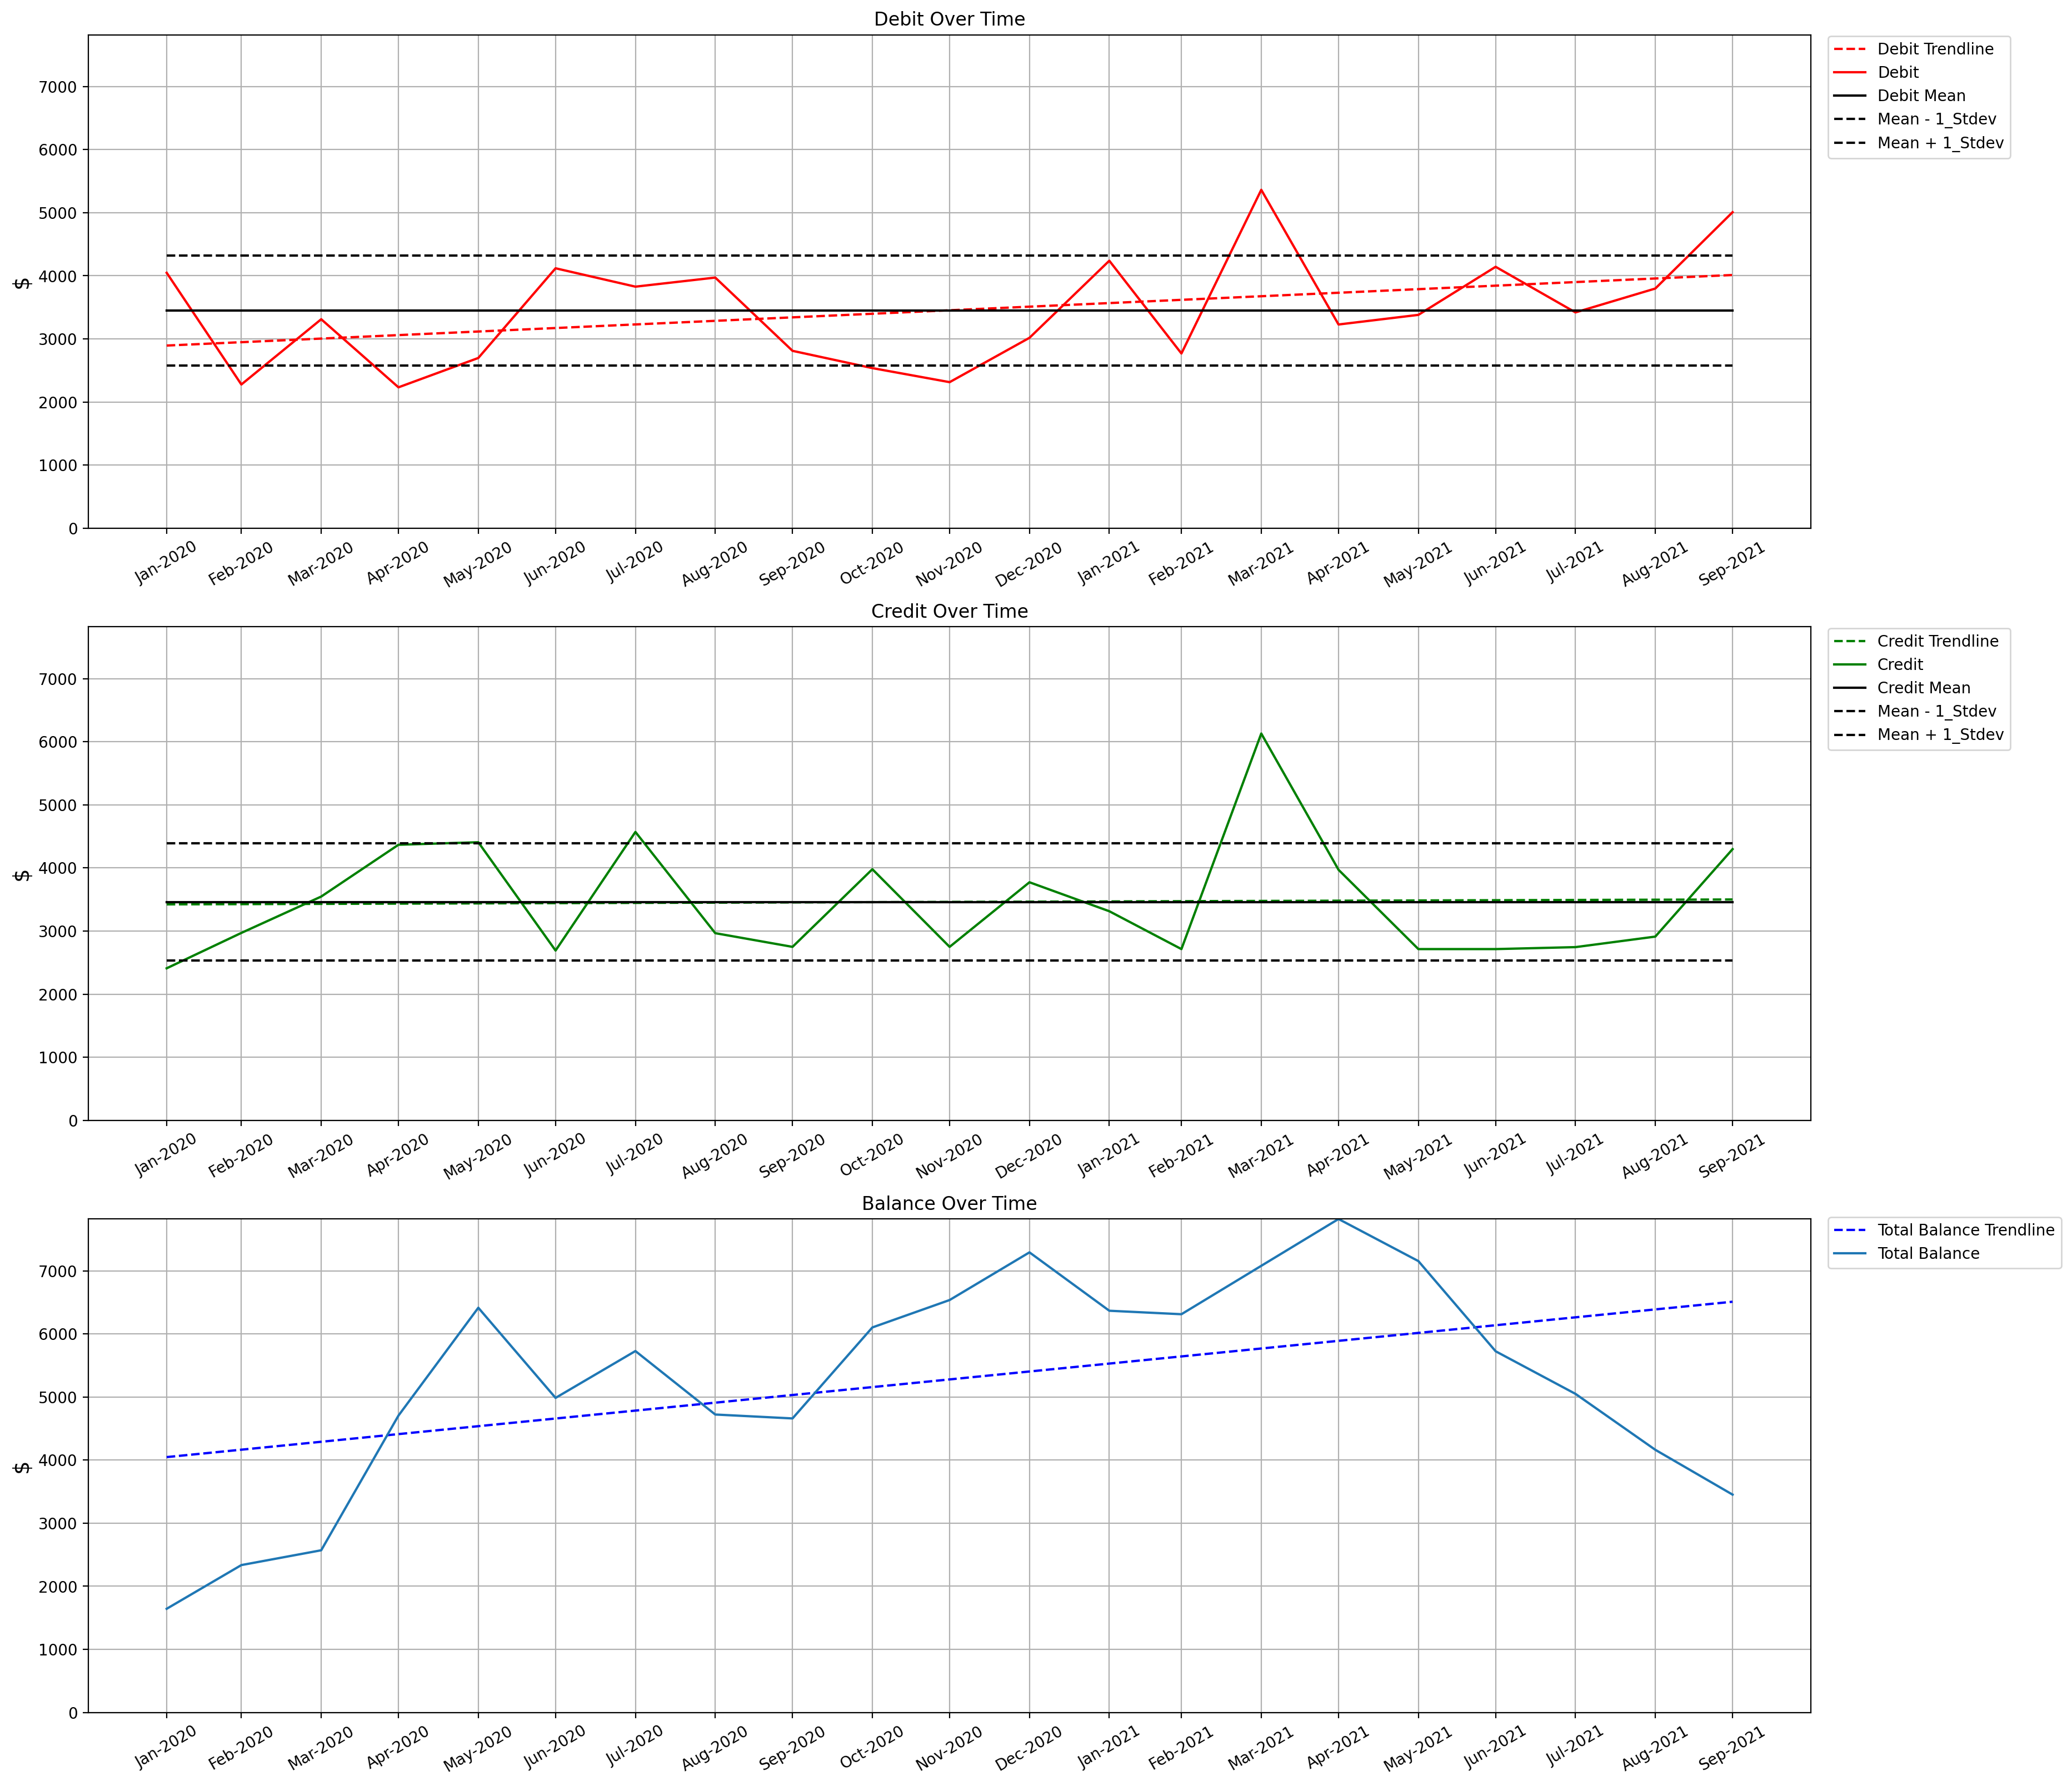

In [237]:
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (20, 20), dpi = 200)

int_months = mdates.date2num(df_consolidated_by_month['Posting Date'])

a0 = np.polyfit(int_months, df_consolidated_by_month['Debit'], 1)
b0 = np.poly1d(a0)
ax[0].plot(int_months, b0(int_months), 'r--', label = 'Debit Trendline')
ax[0].plot(int_months, df_consolidated_by_month['Debit'], 'r', label = 'Debit')
ax[0].plot(int_months, debit_mean_list, 'black', label = 'Debit Mean')
ax[0].plot(int_months, debit_mean_minus_1_std, 'black', ls = '--', label = 'Mean - 1_Stdev')
ax[0].plot(int_months, debit_mean_plus_1_std, 'black', ls = '--', label = 'Mean + 1_Stdev')
ax[0].set_ylim(0, y_lim)
ax[0].set_xticks(df_consolidated_by_month['Posting Date'])
ax[0].xaxis.set_ticklabels(short_date, rotation=30)
ax[0].set_ylabel('$', fontsize = 14)
ax[0].set_title('Debit Over Time')
ax[0].grid()
ax[0].legend(loc = (1.01, 0.75))

a1 = np.polyfit(int_months, df_consolidated_by_month['Credit'], 1)
b1 = np.poly1d(a1)
ax[1].plot(int_months, b1(int_months), 'g--', label = 'Credit Trendline')
ax[1].plot(int_months, df_consolidated_by_month['Credit'], 'g', label = 'Credit')
ax[1].plot(int_months, credit_mean_list, 'black', label = 'Credit Mean')
ax[1].plot(int_months, credit_mean_minus_1_std, 'black', ls = '--', label = 'Mean - 1_Stdev')
ax[1].plot(int_months, credit_mean_plus_1_std, 'black', ls = '--', label = 'Mean + 1_Stdev')
ax[1].set_ylim(0, y_lim)
ax[1].set_xticks(df_consolidated_by_month['Posting Date'])
ax[1].xaxis.set_ticklabels(short_date, rotation=30)
ax[1].set_ylabel('$', fontsize = 14)
ax[1].set_title('Credit Over Time')
ax[1].grid()
ax[1].legend(loc = (1.01, 0.75))

a2 = np.polyfit(int_months, df_consolidated_by_month['Total_Balance'], 1)
b2 = np.poly1d(a2)
ax[2].plot(int_months, b2(int_months), 'b--', label = 'Total Balance Trendline')
ax[2].plot(int_months, df_consolidated_by_month['Total_Balance'], label = 'Total Balance')
ax[2].set_ylim(0, y_lim)
ax[2].set_xticks(df_consolidated_by_month['Posting Date'])
ax[2].xaxis.set_ticklabels(short_date, rotation=30)
ax[2].set_ylabel('$', fontsize = 14)
ax[2].set_title('Balance Over Time')
ax[2].grid()
ax[2].legend(loc = (1.01, 0.9))

fig.savefig('Financial Analysis by month.png',bbox_inches='tight')

plt.show()